In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from pandas.plotting import scatter_matrix

In [90]:
df = pd.read_csv('train1.csv')
df.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36.0,0.0,1.0,563266.44,4.0,0.0,0.0,0.0,1.0,1.0
1,57fea15e,53.0,0.0,2.0,875572.11,2.0,1.0,0.0,1.0,0.0,0.0
2,8df34ef3,35.0,0.0,3.0,701607.06,2.0,1.0,1.0,0.0,0.0,0.0
3,c5c0788b,43.0,0.0,3.0,1393922.16,0.0,1.0,1.0,1.0,0.0,1.0
4,951d69c4,39.0,0.0,3.0,893146.23,1.0,1.0,0.0,1.0,2.0,1.0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   float64
 2   Gender              6650 non-null   float64
 3   Income              6650 non-null   float64
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   float64
 6   Transaction_Status  6650 non-null   float64
 7   Product_Holdings    6650 non-null   float64
 8   Credit_Card         6650 non-null   float64
 9   Credit_Category     6650 non-null   float64
 10  Is_Churn            6650 non-null   float64
dtypes: float64(10), object(1)
memory usage: 571.6+ KB


<AxesSubplot:title={'center':'featurs SD'}>

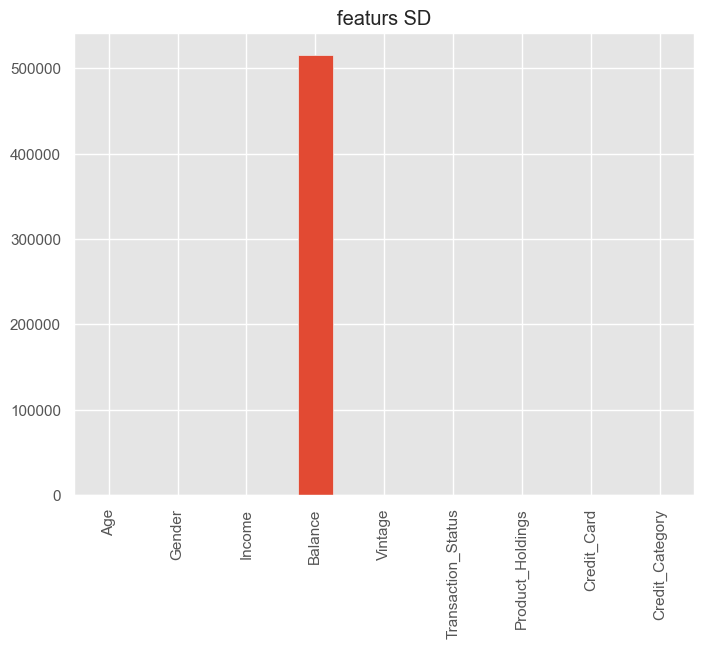

In [92]:
df[featurs].std().plot(kind='bar',figsize=(8,6), title='featurs SD')

<AxesSubplot:title={'center':'featurs SD log'}>

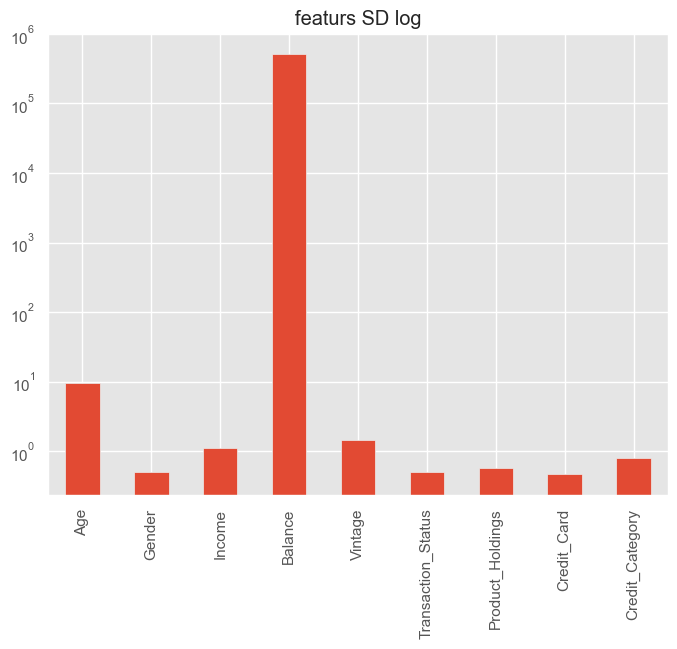

In [93]:
df[featurs].std().plot(kind='bar',figsize=(8,6), logy=True, title='featurs SD log')

In [94]:
featurs_top_var = df[featurs].std().sort_values(ascending=False)
featurs_top_var

Balance               515754.867315
Age                        9.685747
Vintage                    1.458795
Income                     1.096052
Credit_Category            0.799312
Product_Holdings           0.571977
Transaction_Status         0.499788
Gender                     0.498171
Credit_Card                0.472249
dtype: float64

In [95]:
df[featurs].corrwith(df.Is_Churn).sort_values(ascending=False)

Age                   0.204301
Balance               0.056380
Vintage               0.020152
Income                0.004680
Credit_Card          -0.000848
Product_Holdings     -0.030769
Credit_Category      -0.038788
Gender               -0.053589
Transaction_Status   -0.086917
dtype: float64

In [96]:
corr_f = featurs + ['Is_Churn']

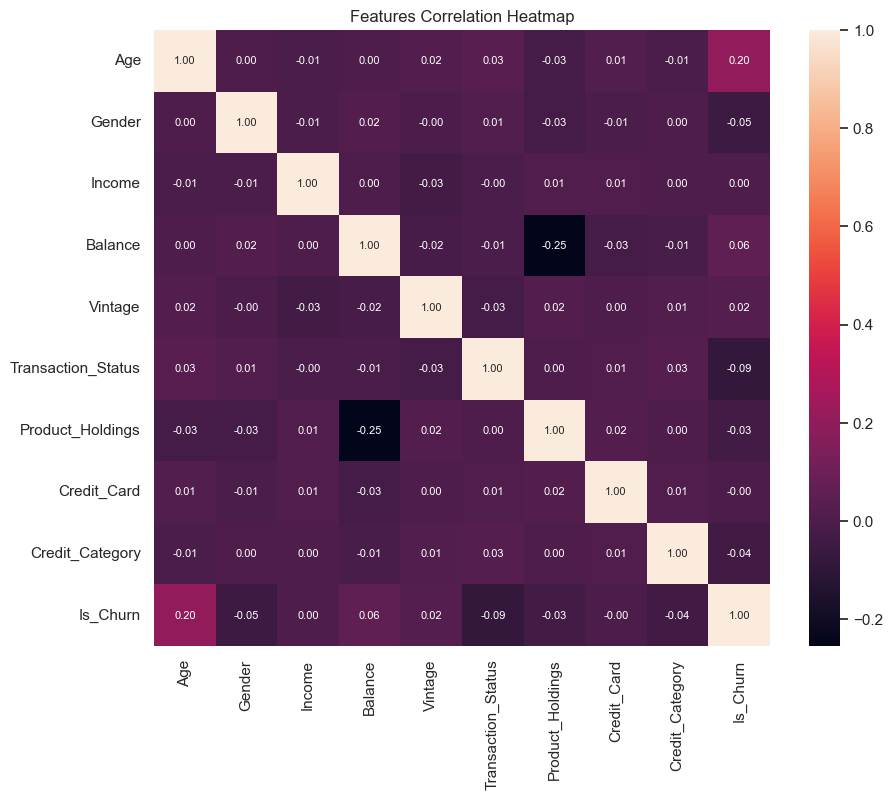

In [97]:
# plot a heatmap to display +ve and -ve correlation among features and regression label:

import seaborn as sns
cm = np.corrcoef(df[corr_f].values.T)
sns.set(font_scale=1.0)
fig = plt.figure(figsize=(10, 8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=corr_f, xticklabels=corr_f)
plt.title('Features Correlation Heatmap')
plt.show()

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Gender', ylabel='Age'>,
        <AxesSubplot:xlabel='Income', ylabel='Age'>,
        <AxesSubplot:xlabel='Balance', ylabel='Age'>,
        <AxesSubplot:xlabel='Vintage', ylabel='Age'>,
        <AxesSubplot:xlabel='Transaction_Status', ylabel='Age'>,
        <AxesSubplot:xlabel='Product_Holdings', ylabel='Age'>,
        <AxesSubplot:xlabel='Credit_Card', ylabel='Age'>,
        <AxesSubplot:xlabel='Credit_Category', ylabel='Age'>,
        <AxesSubplot:xlabel='Is_Churn', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Gender'>,
        <AxesSubplot:xlabel='Gender', ylabel='Gender'>,
        <AxesSubplot:xlabel='Income', ylabel='Gender'>,
        <AxesSubplot:xlabel='Balance', ylabel='Gender'>,
        <AxesSubplot:xlabel='Vintage', ylabel='Gender'>,
        <AxesSubplot:xlabel='Transaction_Status', ylabel='Gender'>,
        <AxesSubplot:xlabel='Product_Holdings', ylabel='Gender'>,
        <AxesSubplo

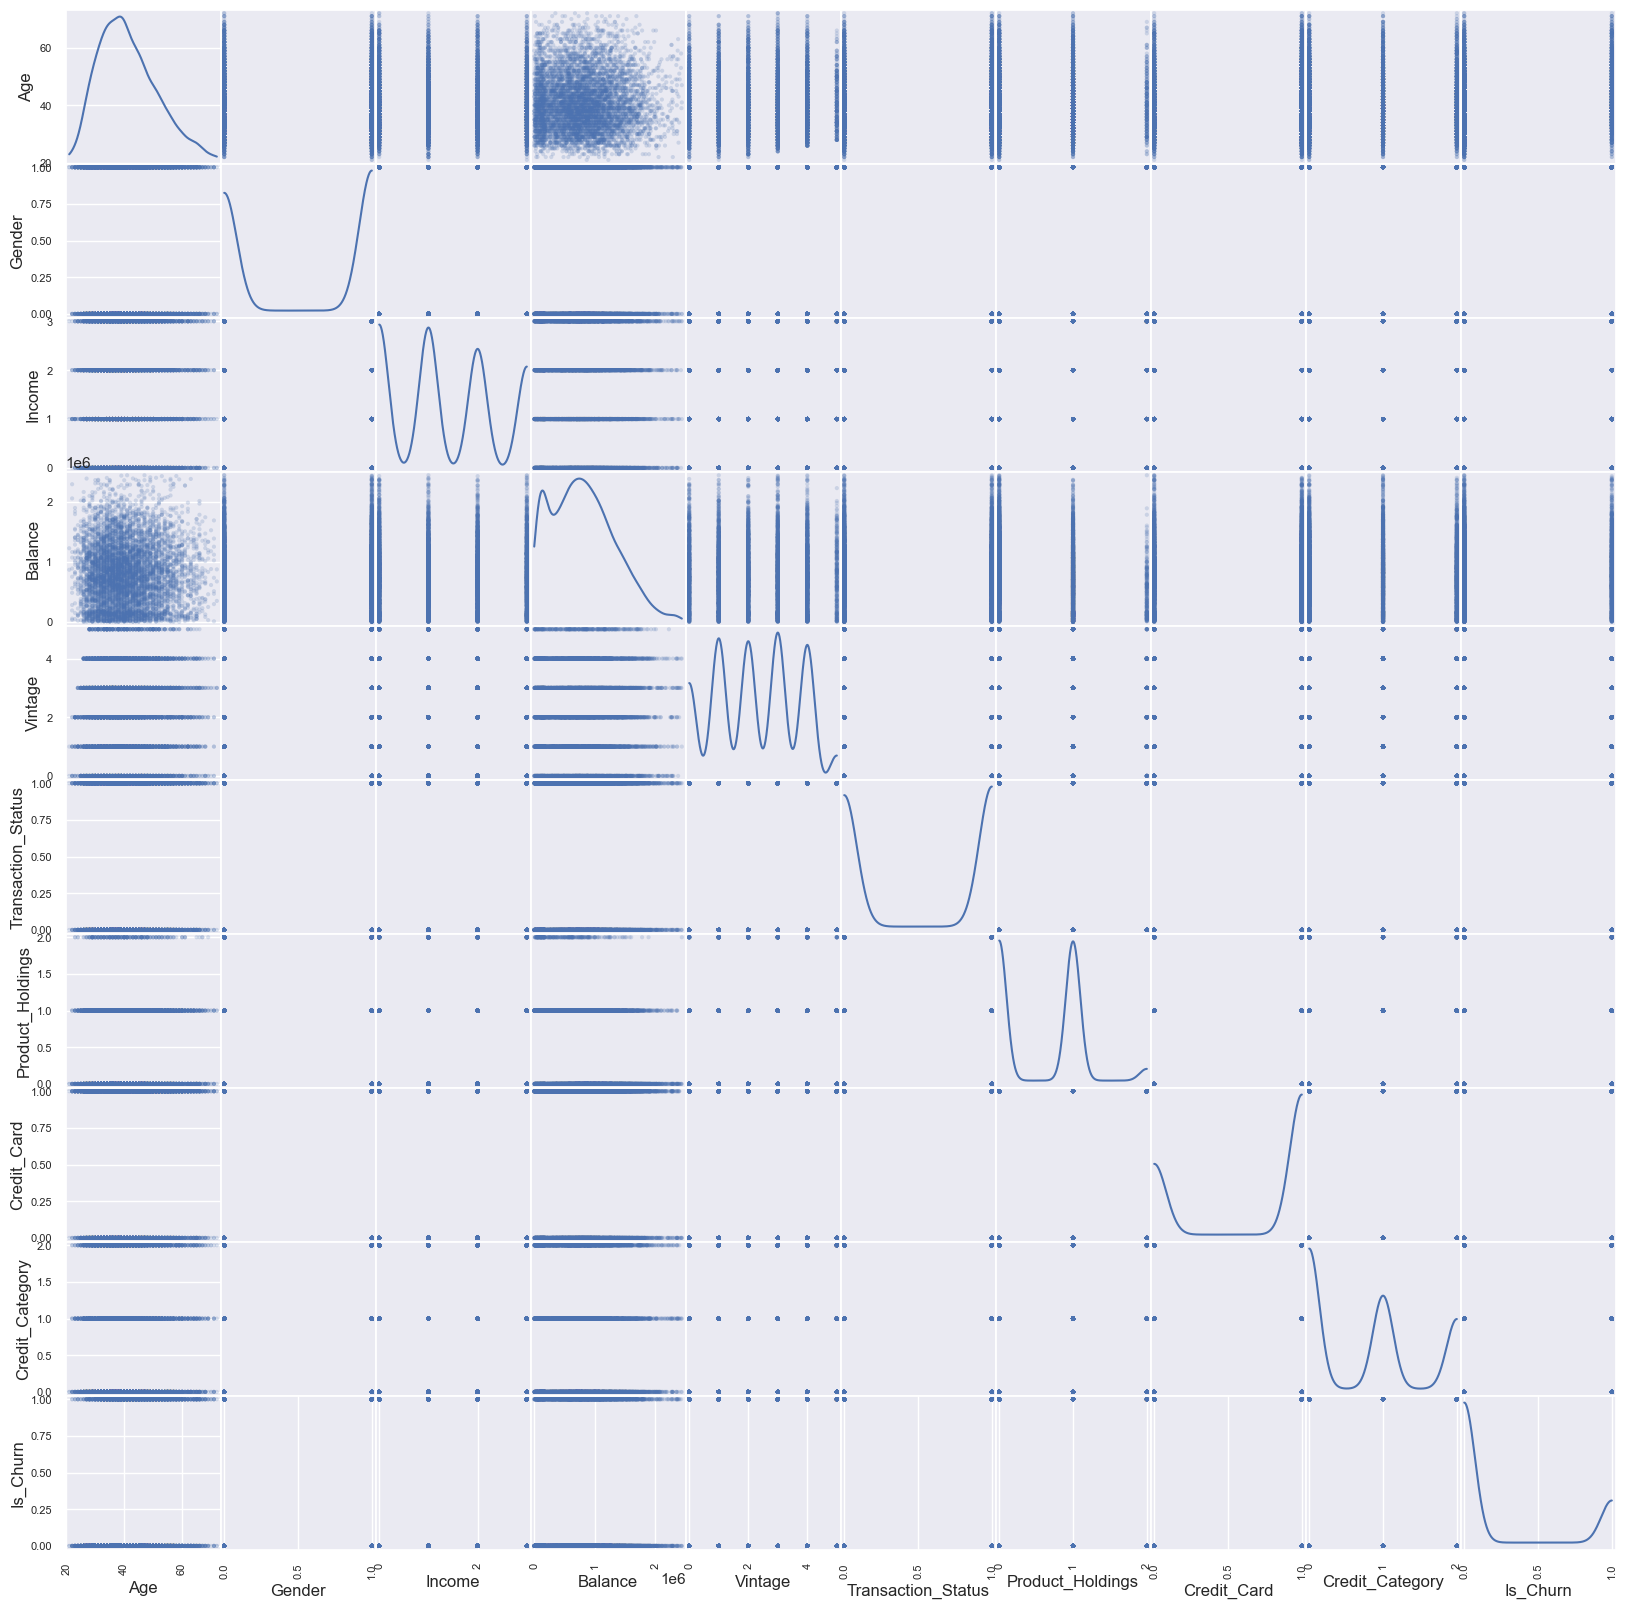

In [98]:
#create scatter matrix to disply relatiohships and distribution among features and regression label

scatter_matrix(df[corr_f], alpha=0.2, figsize=(20, 20), diagonal='kde')


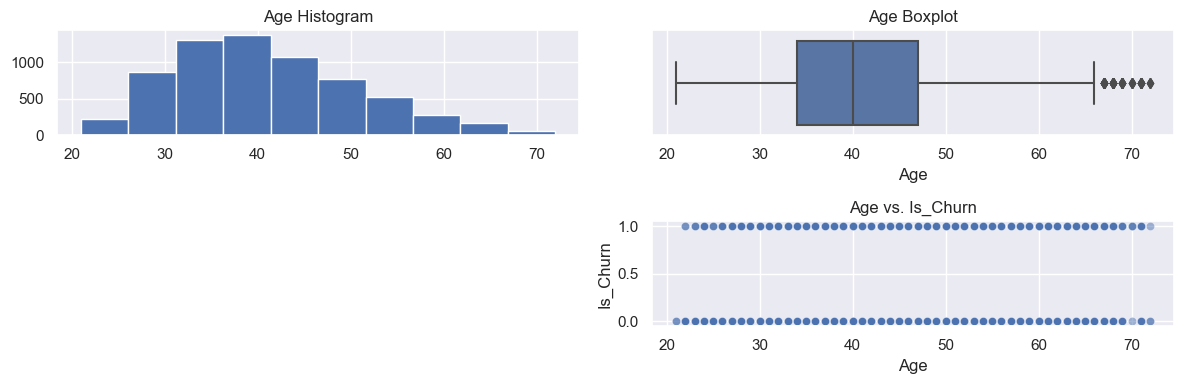

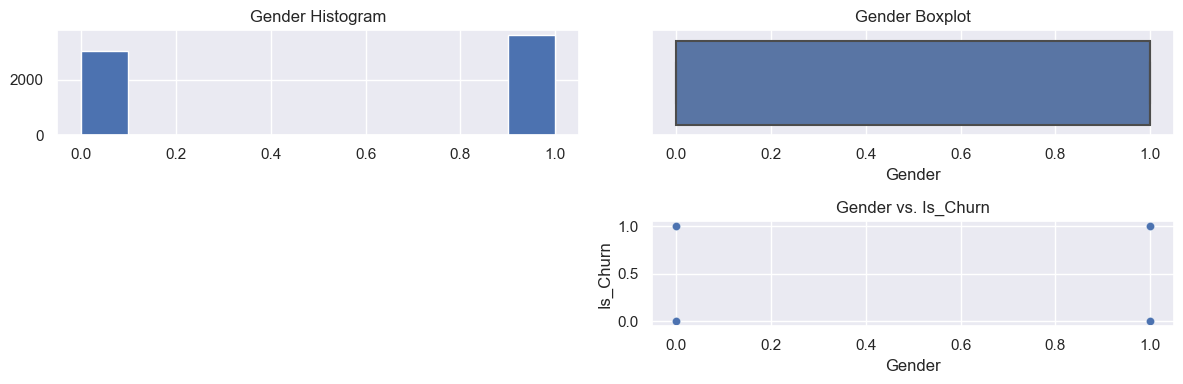

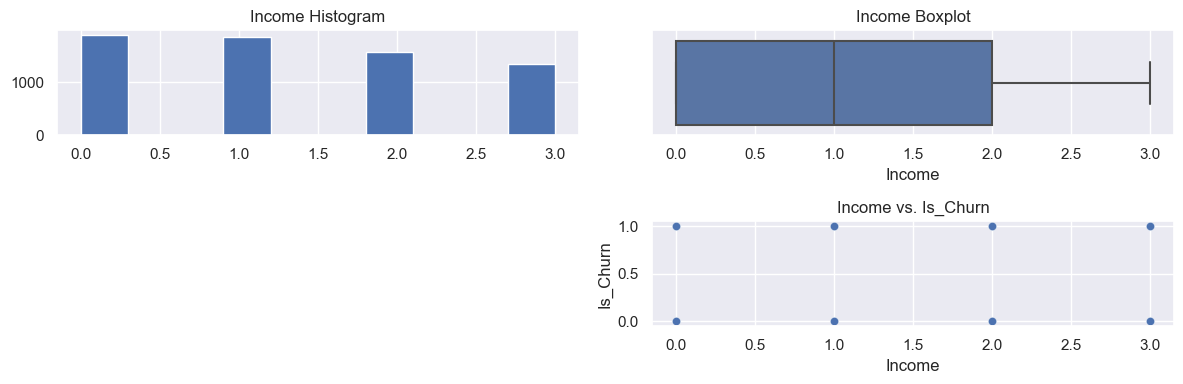

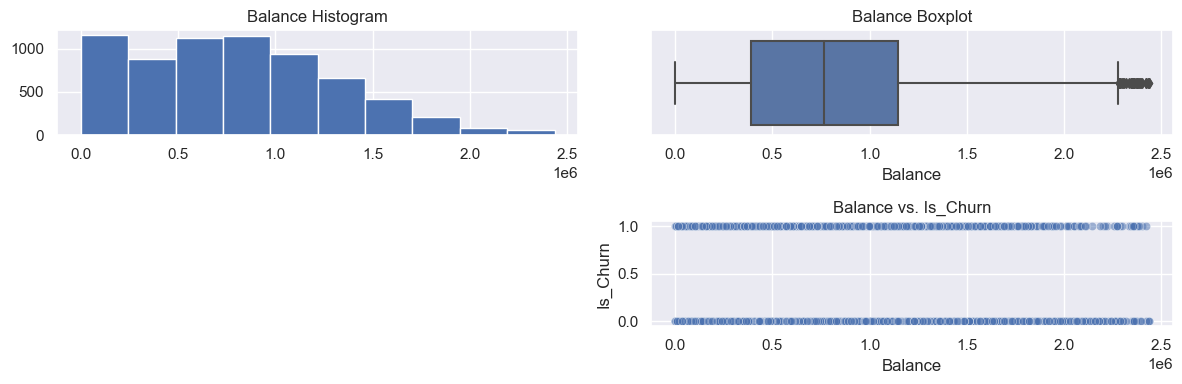

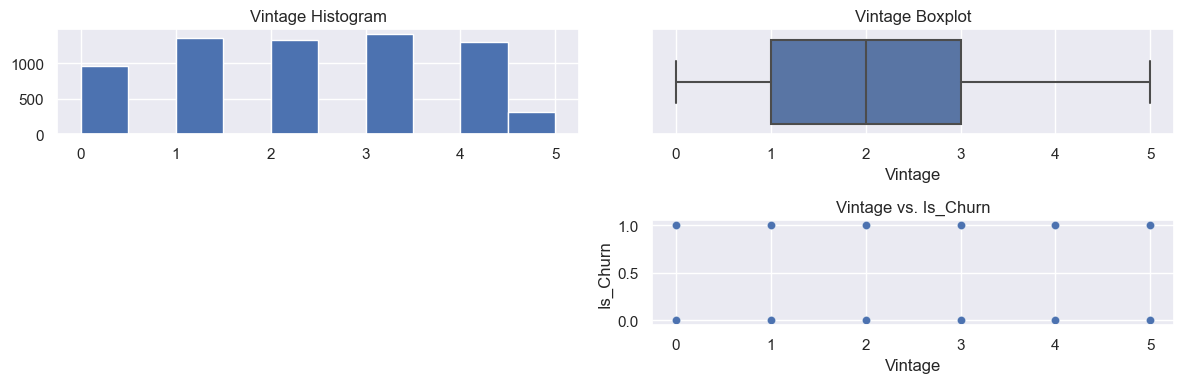

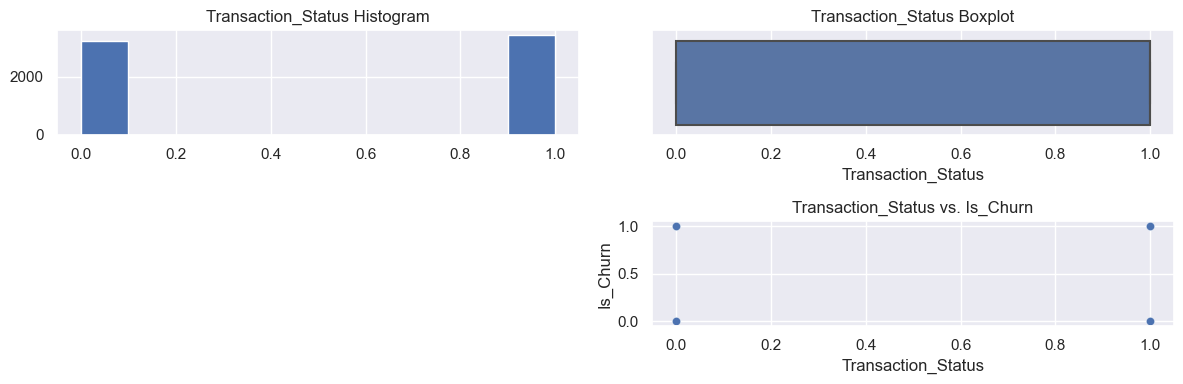

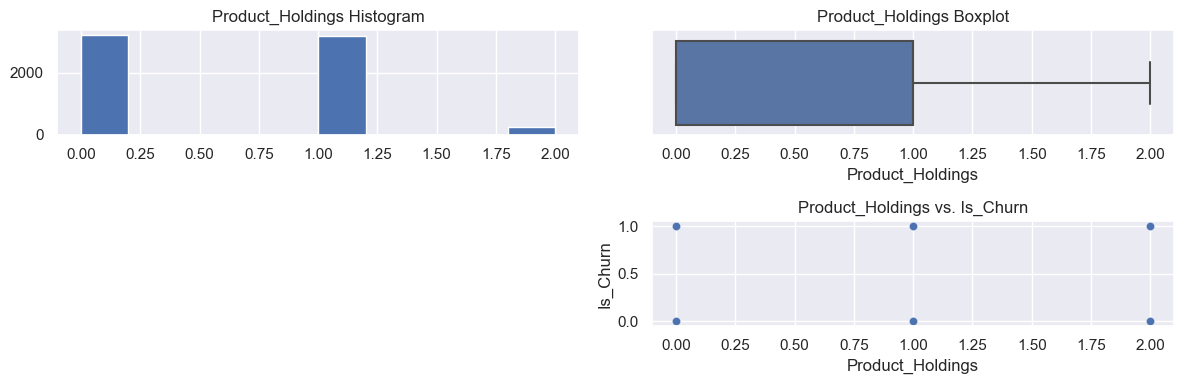

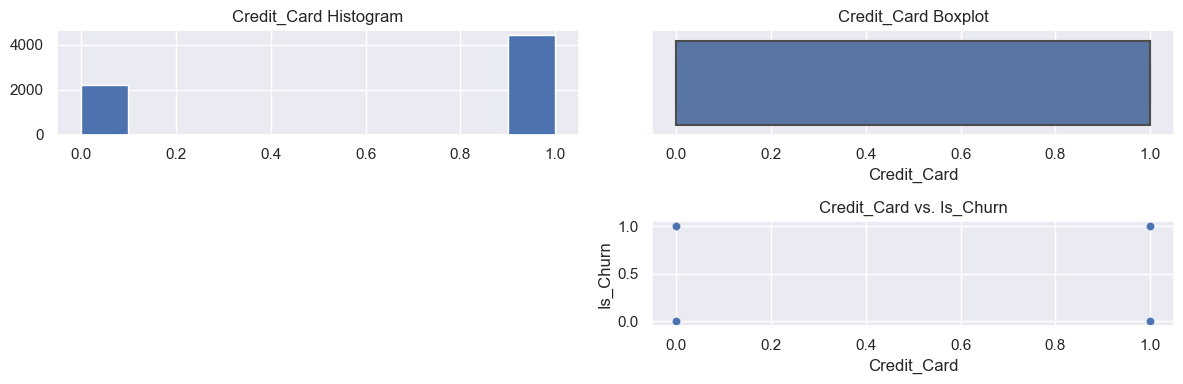

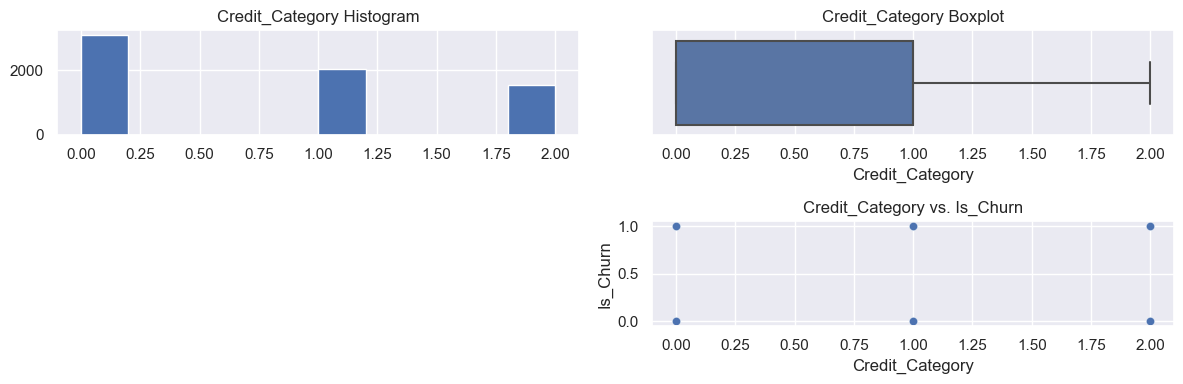

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your DataFrame (replace 'your_data.csv' with your actual data file)
df = df

def explore_col(s, e):
    # Plot 1: Histogram
    plt.figure(figsize=(12, 4))
    sub1 = plt.subplot(221)
    sub1.set_title(s + ' Histogram')
    sub1.hist(df[s])

    # Plot 2: Boxplot
    sub2 = plt.subplot(222)
    sub2.set_title(s + ' Boxplot')
    sns.boxplot(data=df, x=s, ax=sub2)

    # Plot 3: Scatter Plot vs. Regression Label (Is_Churn)
    sub4 = plt.subplot(224)
    sub4.set_title(s + ' vs. Is_Churn')
    sns.scatterplot(data=df, x=s, y='Is_Churn', alpha=0.5)

    plt.tight_layout()
    plt.show()

# Example usage for the specified features
features_to_plot = ['Age', 'Gender', 'Income', 'Balance', 'Vintage', 'Transaction_Status', 'Product_Holdings', 'Credit_Card', 'Credit_Category']
for feature in features_to_plot:
    explore_col(feature, e=10)


In [99]:
# print stat for binary classification label
x = df['Is_Churn']
print(x.value_counts())
print('\nNegaitve samples =  {0:.0%}'.format(x.value_counts()[0]/x.count()))
print('\nPosiitve samples =  {0:.0%}'.format(x.value_counts()[1]/x.count()))

0.0    5113
1.0    1537
Name: Is_Churn, dtype: int64

Negaitve samples =  77%

Posiitve samples =  23%
